# Imdb dataset
+ This is a dataset of 25,000 movies reviews from IMDB, labeled by sentiment (positive/negative).
+ Reviews have been preprocessed, and each review is encoded as a list of word indexes (integers).

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from keras import layers
from keras import losses
from keras import metrics
from keras import models
from keras import optimizers
from keras.datasets import imdb

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [8]:
# train_data[0]

In [5]:
train_labels[0]

1

In [6]:
print(train_data.shape)
print(type(train_data[0]))
print(len(train_data[0]))

(25000,)
<class 'list'>
218


## Decoding to the English words

In [38]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]]
)
# Note that the indices are offset by 3 because 0, 1, and 2 are reserved indices for 'padding', 'start of sequence' and 'unknown'

print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

## Encoding the integer sequences into a binary matrix
convert lists to tensors. <br>
+ Pad the list (same length)
+ One-hot encode (0,1)

In [13]:
# one-hot encode
def vectorize_sequences(_sequences, _dimension=10000):
    results = np.zeros((len(_sequences), _dimension))
    for _i, _sequence in enumerate(_sequences):
        results[_i, _sequence] = 1.
    return results


x_train = vectorize_sequences(train_data)
y_train = np.asarray(train_labels).astype('float32')
x_test = vectorize_sequences(test_data)
y_test = np.asarray(test_labels).astype('float32')

## Build the model (with 3-layer)

In [21]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

## Compiling the model
+ optimizer: use gradient descent to optimize the minimum of loss function
+ loss: the loss function that use
+ metrics: calculate how often predictions match labels
<b>Cross entropy</b>
+ https://tonydeep.github.io/tensorflow/2017/07/07/Cross-Entropy-Loss.html
+ Entropy: giá trị trung bình tối ưu của một đại lượng nào đó
+ Cross Entropy: cho biết mức độ khác biệt giữa 2 phân bổ xác suất

In [22]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001), loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

## Setting aside a validation set
In order to monitor during training the accuracy of the model on data it has never seen before, you'll create a validation set by setting apart 10000 samples from the original training data

In [23]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

### Training the model

In [24]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
history_dict = history.history
history_dict.keys()

Epoch 1/20
30/30 [==============================] - 4s 111ms/step - loss: 0.5379 - binary_accuracy: 0.7653 - val_loss: 0.4294 - val_binary_accuracy: 0.8417
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.3187 - binary_accuracy: 0.9005 - val_loss: 0.3171 - val_binary_accuracy: 0.8816
Epoch 3/20
30/30 [==============================] - 0s 17ms/step - loss: 0.2305 - binary_accuracy: 0.9269 - val_loss: 0.2813 - val_binary_accuracy: 0.8895
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1797 - binary_accuracy: 0.9423 - val_loss: 0.2744 - val_binary_accuracy: 0.8895
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1435 - binary_accuracy: 0.9547 - val_loss: 0.2801 - val_binary_accuracy: 0.8872
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1192 - binary_accuracy: 0.9631 - val_loss: 0.2915 - val_binary_accuracy: 0.8859
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - lo

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

### Visualize

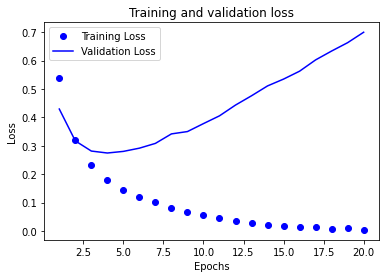

In [30]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, 21)

plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

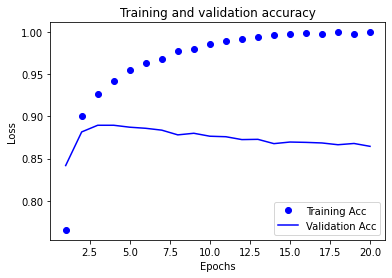

In [32]:
plt.clf()
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training Acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation Acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Conclusion
+ The training loss decreases with every epoch, and the training accuracy increases with every epoch (expect)
+ The validation loss and accuracy illustrate that this model performs better on the training data. However, it does not good at testing data (validation loss increase with every epoch, and the validation accuracy decreases with every epoch)
==> <b>Over-fitting</b> because of over-optimizing on the training data (20 epochs)

## Retraining a model from scratch

In [33]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001), loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 37ms/step - loss: 0.4592 - binary_accuracy: 0.8159
Epoch 2/4
49/49 [==============================] - 1s 18ms/step - loss: 0.2624 - binary_accuracy: 0.9086
Epoch 3/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2023 - binary_accuracy: 0.9295
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2937 - binary_accuracy: 0.8841


In [34]:
model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.19277482],
       [0.99966   ],
       [0.899774  ],
       ...,
       [0.15659225],
       [0.08271556],
       [0.62987226]], dtype=float32)